In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 144125079'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,TESScut,1426,TIC 144125079,0.0
1,TESS Sector 04,2018,TESScut,1426,TIC 144125079,0.0
2,TESS Sector 05,2018,TESScut,1426,TIC 144125079,0.0
3,TESS Sector 30,2020,TESScut,475,TIC 144125079,0.0
4,TESS Sector 31,2020,TESScut,475,TIC 144125079,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,TESS-SPOC,1800,144125079,0.0
1,TESS Sector 31,2020,TESS-SPOC,600,144125079,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,QLP,1800,144125079,0.0
1,TESS Sector 03,2018,GSFC-ELEANOR-LITE,1800,144125079,0.0
2,TESS Sector 03,2018,TASOC,1800,144125079,0.0
3,TESS Sector 03,2018,TASOC,1800,144125079,0.0
4,TESS Sector 04,2018,TESS-SPOC,1800,144125079,0.0
5,TESS Sector 04,2018,QLP,1800,144125079,0.0
6,TESS Sector 04,2018,GSFC-ELEANOR-LITE,1800,144125079,0.0
7,TESS Sector 04,2018,TASOC,1800,144125079,0.0
8,TESS Sector 04,2018,TASOC,1800,144125079,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 31,2020,TESS-SPOC,600,144125079,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 144125079" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2144.5269543442046,1.0087880e+03,2.7040191e+00,2.4151476e-03,132057,431.08147,1928.90066,7.7341266e+02,2.0083828e+00,4.5761942e+02,7.3116183e-01,1.0087880e+03,2.7040191e+00,0,———,———,———,———,431.08147,1.5174154e-03,1928.90066,1.4997598e-03,-2.6498141e-03,3.3361636e-02
2144.5338988514645,1.0065327e+03,2.7080500e+00,2.4152135e-03,132058,431.08551,1928.89708,7.7206714e+02,2.0113766e+00,4.5716263e+02,7.3515570e-01,1.0065327e+03,2.7080500e+00,0,———,———,———,———,431.08551,1.5213268e-03,1928.89708,1.5052512e-03,7.2825409e-05,3.2844387e-02
2144.540843358492,1.0060261e+03,2.7026625e+00,2.4152792e-03,132059,431.08545,1928.89692,7.7172321e+02,2.0073750e+00,4.5754062e+02,7.3184824e-01,1.0060261e+03,2.7026625e+00,0,———,———,———,———,431.08545,1.5170528e-03,1928.89692,1.5033392e-03,-8.9235284e-04,3.3605248e-02
2144.547787865518,1.0069504e+03,2.7043650e+00,2.4153448e-03,132060,431.08217,1928.90007,7.7242914e+02,2.0086396e+00,4.5695764e+02,7.3329765e-01,1.0069504e+03,2.7043650e+00,0,———,———,———,———,431.08217,1.5171717e-03,1928.90007,1.5025692e-03,-1.7693693e-04,3.2653008e-02
2144.554732372545,1.0073771e+03,2.7058971e+00,2.4154105e-03,132061,431.08556,1928.89635,7.7269690e+02,2.0097775e+00,4.5700830e+02,7.3117149e-01,1.0073771e+03,2.7058971e+00,0,———,———,———,———,431.08556,1.5225799e-03,1928.89635,1.4995618e-03,-8.8741508e-04,3.3280622e-02
2144.5616768791065,1.0020982e+03,2.7015872e+00,2.4154757e-03,132062,431.08219,1928.89893,7.6881726e+02,2.0065763e+00,4.5792017e+02,7.3217690e-01,1.0020982e+03,2.7015872e+00,0,———,———,———,———,431.08219,1.5229156e-03,1928.89893,1.5064910e-03,4.9471878e-04,3.2857146e-02
2144.5686213859003,1.0008500e+03,2.7032175e+00,2.4155411e-03,132063,431.08498,1928.89634,7.6786115e+02,2.0077875e+00,4.5769223e+02,7.3265010e-01,1.0008500e+03,2.7032175e+00,0,———,———,———,———,431.08498,1.5281625e-03,1928.89634,1.5108688e-03,4.7470568e-04,3.2670733e-02
2144.5755658922294,1.0070286e+03,2.7048965e+00,2.4156061e-03,132064,431.08456,1928.89631,7.7242065e+02,2.0090344e+00,4.5785382e+02,7.3198920e-01,1.0070286e+03,2.7048965e+00,0,———,———,———,———,431.08456,1.5183580e-03,1928.89631,1.5028208e-03,-7.6588360e-05,3.1737510e-02


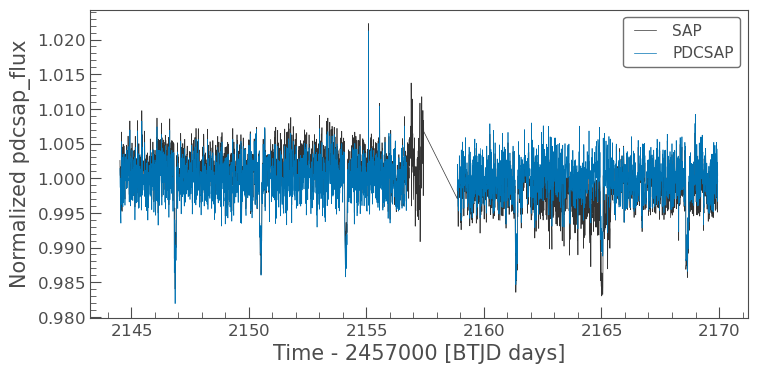

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 144125079')

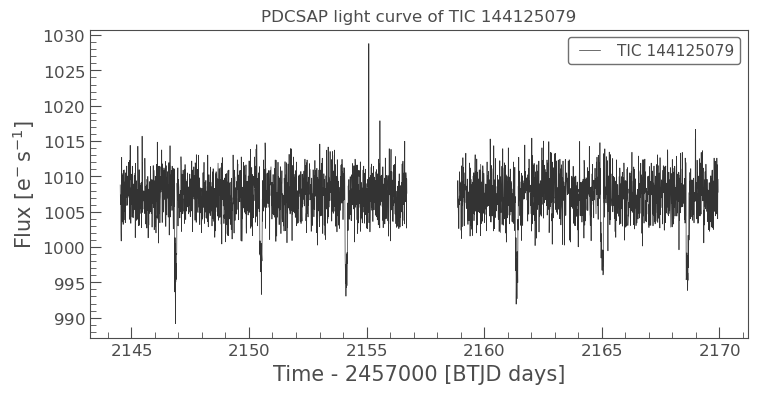

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 144125079")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=3.625248252482525135)
binned_lc = folded_lc.bin(time_bin_size=0.01)

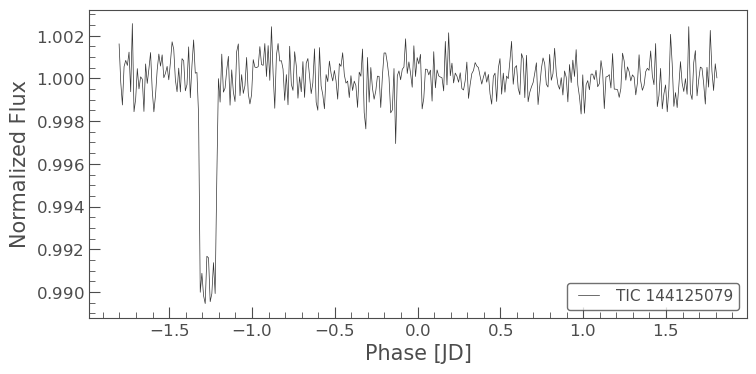

In [16]:
lcf[0].flatten(window_length=401).fold(period=3.625248252482525135).bin(time_bin_size=0.01).plot();

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 144125079, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

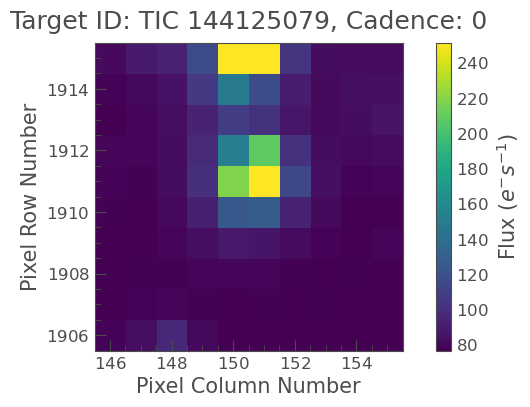

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

4

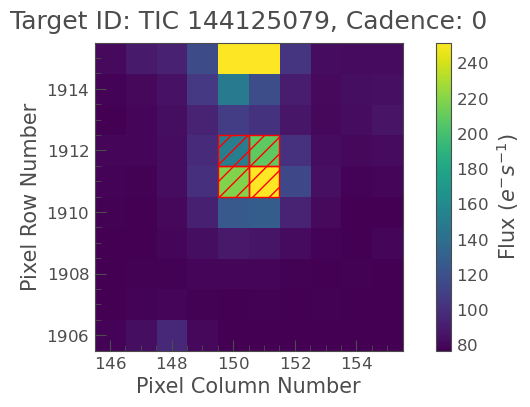

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1410.9305876559301,999.0706787109375,0.9549413919448853,150.63028410069074,1911.359294593474,0,0
1410.9514210259335,999.4313354492188,0.9554401636123657,150.6301356643057,1911.3611826409096,1,0
1411.013921133851,995.8212280273438,0.954522430896759,150.62904769901814,1911.362156527506,2,0
1411.034754502226,997.575439453125,0.9553711414337158,150.63049144850467,1911.3644896537478,3,0
1411.0555878701339,996.8591918945312,0.9538695812225342,150.62971625174552,1911.365069158559,4,0
1411.076421237577,997.887939453125,0.9540875554084778,150.6295702758683,1911.3639073119275,5,0
1411.097254604554,998.0389404296875,0.9543557167053223,150.6295833442903,1911.3643622105606,6,0
1411.1180879708331,998.833251953125,0.9550158977508545,150.62953904836723,1911.365115496694,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

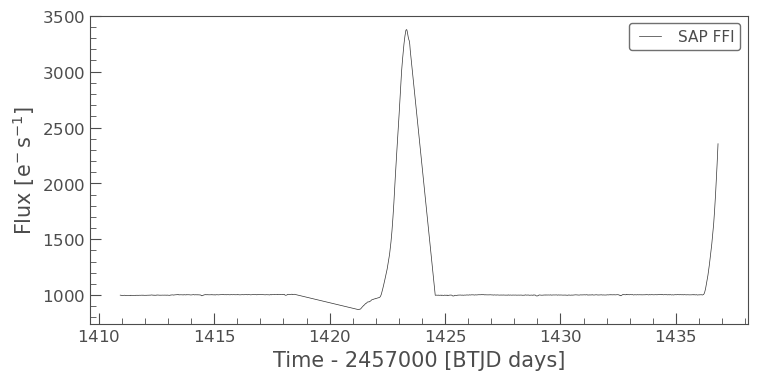

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

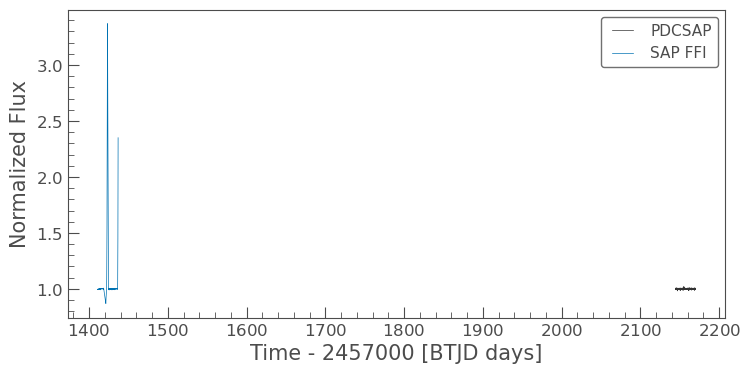

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()

In [27]:
ffi_data.interact_sky()

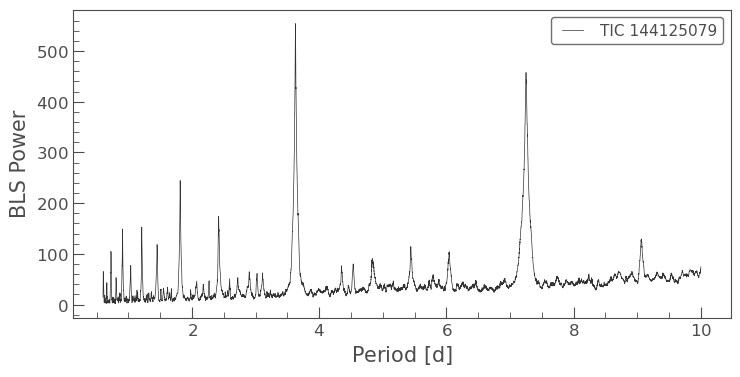

In [28]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [29]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 3.625 d


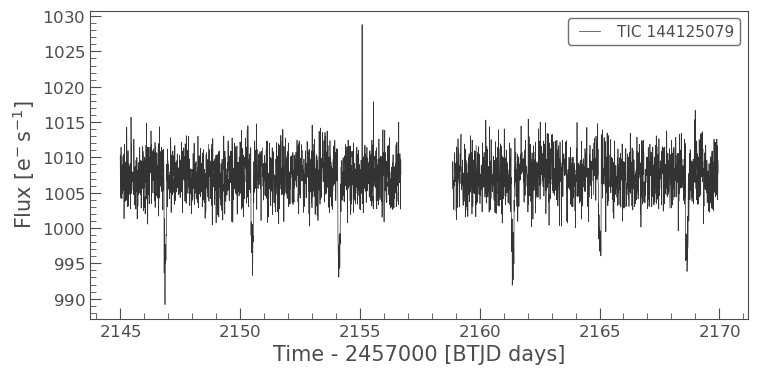

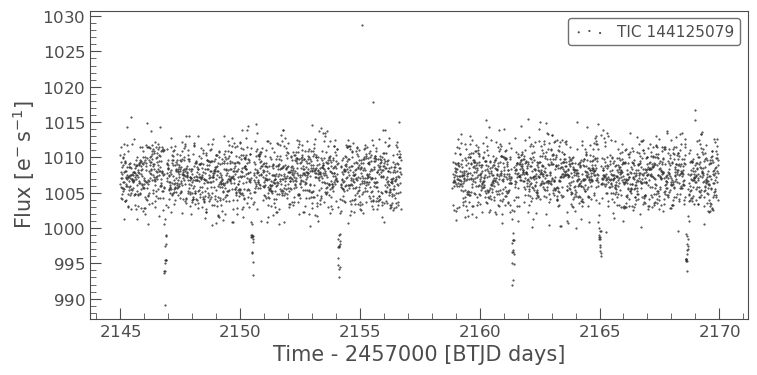

In [30]:
mask = ((lcf[0].time.value < 2170)&(lcf[0].time.value > 2145))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [31]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 617.855726)

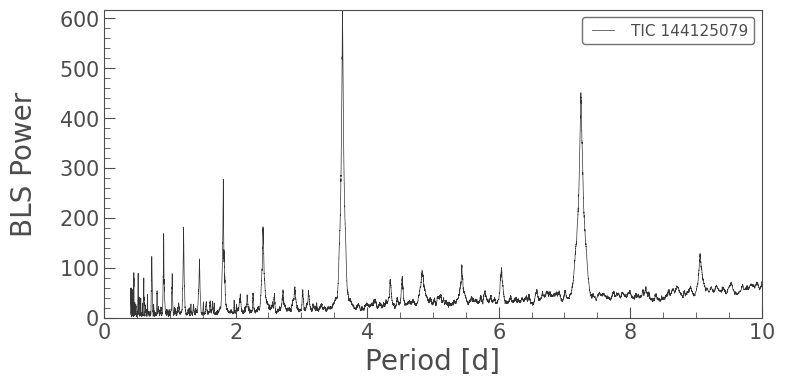

In [32]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 617.855726])

In [33]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [34]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 3.625248252482525135 d
BLS max power = 617.855726
Epoch max power = 2459146.886125
----------------------------------------
Period at 2th max power = 3.626136261362614022 d
BLS max power = 612.657046
Epoch max power = 2459146.881125
----------------------------------------
Period at 3th max power = 3.625544255442554764 d
BLS max power = 608.193589
Epoch max power = 2459146.886125
----------------------------------------
Period at 4th max power = 3.626432264322642762 d
BLS max power = 607.532696
Epoch max power = 2459146.886125
----------------------------------------
Period at 5th max power = 3.627024270242702464 d
BLS max power = 604.202063
Epoch max power = 2459146.881125
----------------------------------------
Period at 6th max power = 3.626728267282672835 d
BLS max power = 604.202063
Epoch max power = 2459146.881125
----------------------------------------
Period at 7th max power = 3.624952249522495507 d
BLS max power = 603.870646
Epoch max power = 245914

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1000.0, 1020.0)

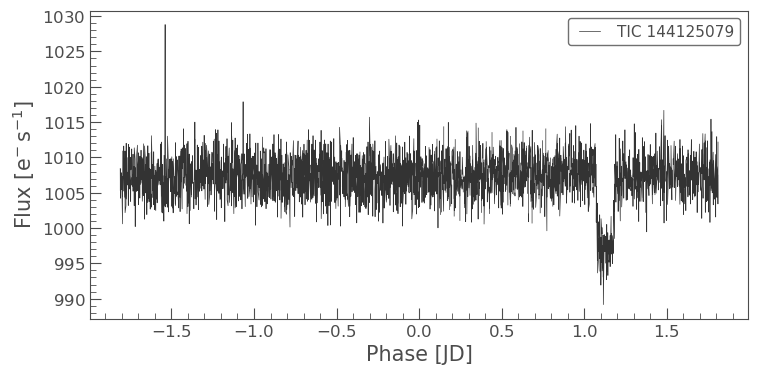

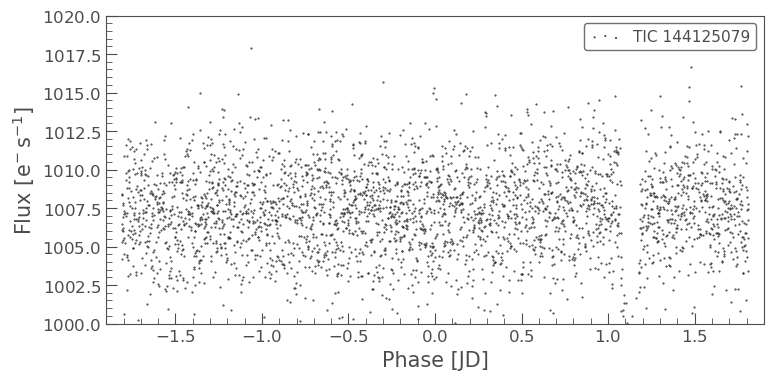

In [35]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 3.625248252482525135
epochtime = 2459146.886125
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([1000,1020])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(987.0, 1017.0)

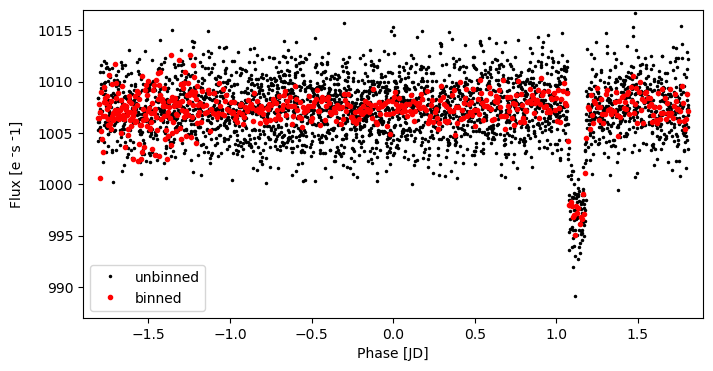

In [36]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([987,1017])

In [37]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  995.0438842773438 electron / s
median flux = 1007.3963623046875 electron / s
Tdepth =  12.35247802734375 electron / s
Tdepth in ppm =  12352478.02734375 electron / s ppm
Rp/Rs ratio =  3.5146092282562154 electron(1/2) / s(1/2)


In [38]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [39]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 2.4000000000000004 d hours


In [40]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  10.140385149942173 electron / s
depth in ppm = 10140385.149942173 electron / s ppm


In [41]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

3.625248252482525 d
2146.8861250352334
0.1 d


In [42]:
P = 3.625248252482525135 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 0.99 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 6885908233.536756 m
a = 6885908.233536756 km
a = 0.04602945266109276 AU
The planetary mass was neglected


In [43]:
L = 1.215353 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.0511262358234446 AU
The outer boundary of the habitable zone ro = 1.5143047473756819 AU


In [44]:
Rs = 1.16869 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 2860208.6527876966 electron(1/2) / s(1/2) km
Rp= 448.9418698458164 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 8.461367529577261


In [45]:
P = 3.625248252482525135 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 108099.67157549746 m/s


In [46]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  3.625248252482525 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  12.35247802734375 electron / s
Transit depth in ppm =  12352478.02734375 electron / s ppm
Transit Depth from bls model in ppm = 10140385.149942173 electron / s ppm
Rp/Rs ratio =  3.5146092282562154 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 2860208.6527876966 electron(1/2) / s(1/2) km
Rp= 448.9418698458164 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 8.461367529577261
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 108099.67157549746 m/s
- - - - - - - - - - - - - - - - - - - - 


In [47]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
